<center><h1><font color=yellow><i> Deep Learning </i></font></h1></center>

# $Import$ $Libraries$ :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner
import seaborn as sns
from sklearn import metrics


# $Data$ :

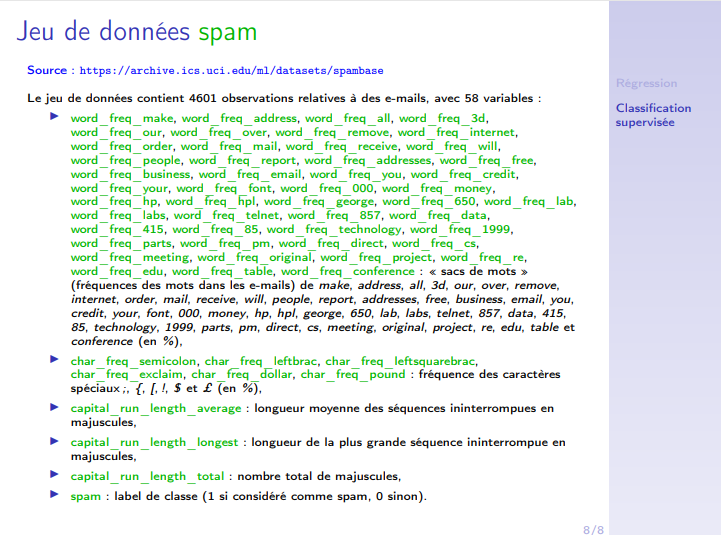

<b><font color="skyblue">Step 1:</font></b>
 
- Import **data** (pandas dataframe). 

In [2]:
df_spam=pd.read_csv('spam.csv')
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<b><font color="skyblue">Step 2:</font></b>
 
- Vérificarion des valeurs nulles

In [3]:
# Vérification des valeurs manquantes dans votre DataFrame 'X'
missing_values = df_spam.isnull().sum()

# Affichage des colonnes avec des valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_values[missing_values > 0])

Colonnes avec des valeurs manquantes :
Series([], dtype: int64)


--> Pas de valeurs manquantes 

<b><font color="skyblue">Step 3:</font></b>

Vérification des valeurs abérantes 


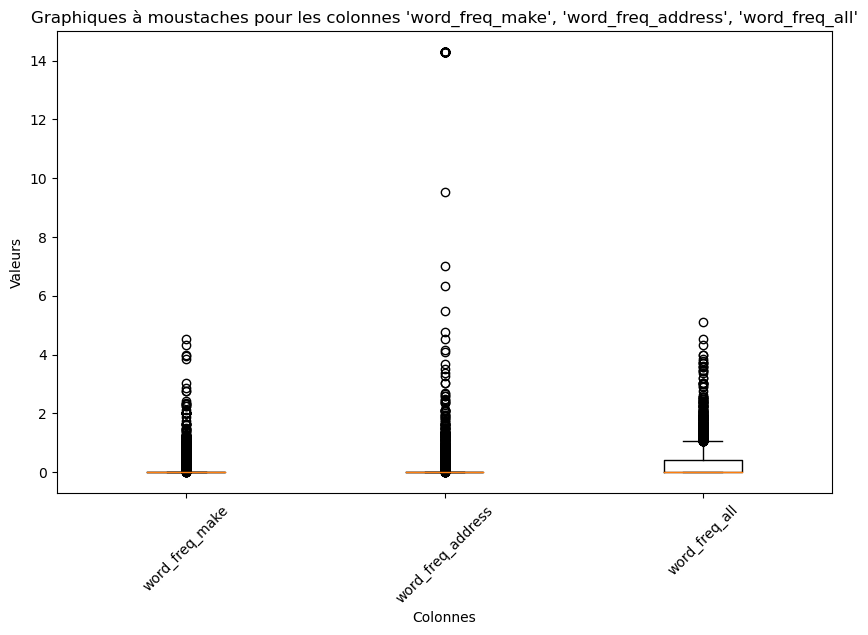

In [4]:
# Supposons que vous souhaitez visualiser plusieurs colonnes en même temps
columns_to_plot = ['word_freq_make', 'word_freq_address', 'word_freq_all']  # Ajoutez les colonnes à visualiser

plt.figure(figsize=(10, 6))
plt.boxplot([df_spam[col] for col in columns_to_plot], labels=columns_to_plot)
plt.title("Graphiques à moustaches pour les colonnes 'word_freq_make', 'word_freq_address', 'word_freq_all'")
plt.xlabel("Colonnes")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.show()


--> Nous avons beacoup de valeur, mais ceci est normal dans notre cas car : dans le cas des fréquences de mots, la variation des valeurs peut être significative, ce qui peut conduire à des valeurs aberrantes. Ces valeurs ne sont pas nécessairement des erreurs ou des données corrompues, mais plutôt des manifestations de la diversité et de la variabilité des données linguistiques

<b><font color="skyblue">Step :4</font></b>
 
- Separate the output (the column `spam`) and the input (the other columns). 

In [5]:
y=df_spam['spam']
X=df_spam.drop('spam',axis=1)

In [6]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [7]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [8]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


<b><font color="skyblue">Step 3:</font></b>
 
- Split our data into **train data** (80% -- 3680 rows) and **test data** (921 rows). 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Analyse des corrélations 

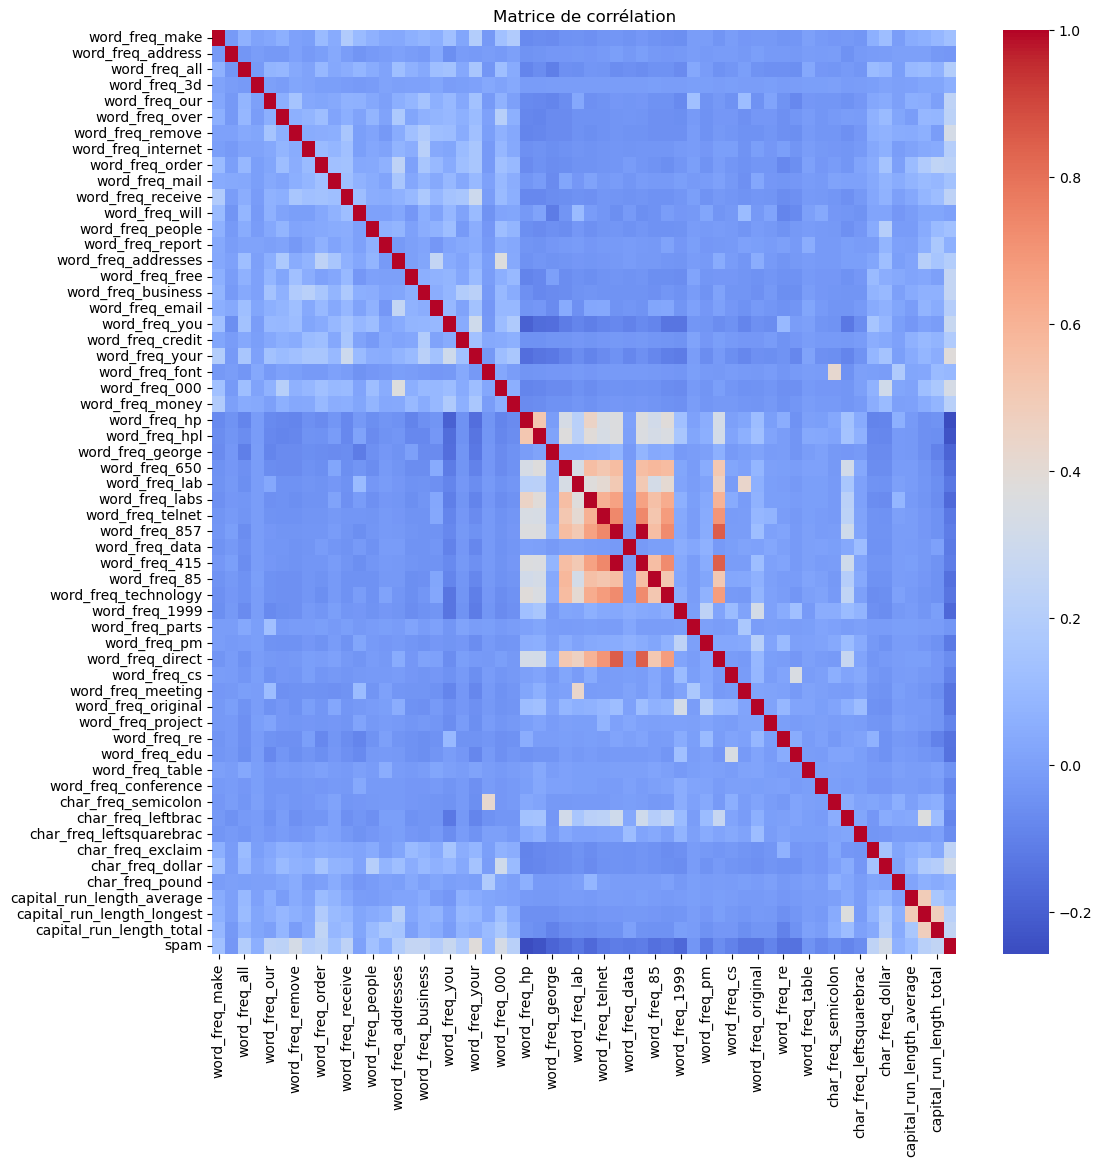

In [10]:
# Calcul de la matrice de corrélation
correlation_matrix = df_spam.corr()

# Création de la carte de chaleur pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 12))  # Ajustez la taille de la figure selon vos préférences
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")  # Crée la carte de chaleur avec les annotations des valeurs et une palette de couleurs
plt.title('Matrice de corrélation')  # Ajoute un titre à la carte de chaleur
plt.show()

# $DNN$

## $Building$ $our$ $Model$ : (Keras sans optimization des hyperparamètres)

<b><font color="skyblue">Step 1:</font></b>
 
- Creation of our model using **Keras**.

In [11]:
model1 = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[57], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(100, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                        

<b><font color="skyblue">Step 2:</font></b>
 
- Precise the `optimizer`, the `loss-fonction` & the `metric`.

In [13]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

<b><font color="skyblue">Step 3:</font></b>
 
- Train the model.

In [14]:
hist = model1.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=50,
                 validation_split=0.2)

Epoch 1/50
92/92 [==============================] - 2s 7ms/step - loss: 0.6799 - accuracy: 0.6416 - val_loss: 0.5653 - val_accuracy: 0.7242
Epoch 2/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.6865 - val_loss: 0.5518 - val_accuracy: 0.7215
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7018 - val_loss: 0.5762 - val_accuracy: 0.6875
Epoch 4/50
92/92 [==============================] - 0s 5ms/step - loss: 0.5676 - accuracy: 0.7150 - val_loss: 0.5439 - val_accuracy: 0.7201
Epoch 5/50
92/92 [==============================] - 0s 5ms/step - loss: 0.5461 - accuracy: 0.7215 - val_loss: 0.5954 - val_accuracy: 0.6671
Epoch 6/50
92/92 [==============================] - 0s 5ms/step - loss: 0.5376 - accuracy: 0.7286 - val_loss: 0.5627 - val_accuracy: 0.6861
Epoch 7/50
92/92 [==============================] - 0s 5ms/step - loss: 0.5146 - accuracy: 0.7395 - val_loss: 0.5386 - val_accuracy: 0.7052
Epoch 8/50
92/92 [==

<b><font color='red'>PS :</font></b> The accuracy of our model on the validation data is **92%**

In [15]:
history_df = pd.DataFrame(hist.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.679890,0.641644,0.565281,0.724185
1,0.611295,0.686481,0.551817,0.721467
2,0.585049,0.701766,0.576237,0.687500
3,0.567638,0.715014,0.543881,0.720109
4,0.546102,0.721467,0.595380,0.667120


We'll plot the curve of the loss function (for training and validation) as a function of the number of epochs

Minimum validation loss: 0.20755238831043243


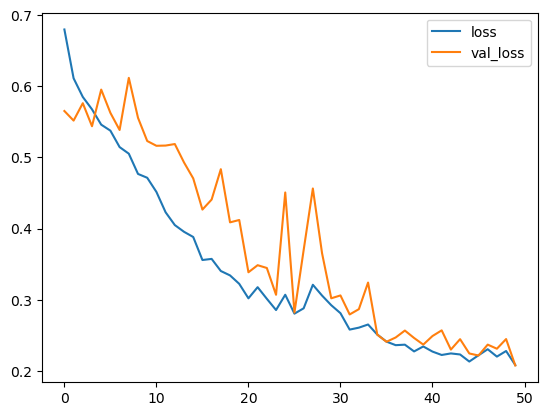

In [16]:
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                        

## $Keras$ $tuner$ : (Le deuxième modèle en optimisant les hyperparamètres)

Dans cette partie, nous allons utiliser **Keras Tuner** pour effectuer une recherche d'hyperparamètres pour un modèle de réseau de neurones. Le but de cette parrtie est de trouver les meilleures **valeurs** d'hyperparamètres pour maximiser la précision (`accuracy`) du modèle sur un ensemble de validation.

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score

def build_model(hp):
    """
    Fonction construisant et configurant un modèle de réseau de neurones 
    en fonction des hyperparamètres spécifiés.

    Parameters 
    ----------
    hp : de type HyperParameters fourni par Keras Tuner. Il est utilisé pour spécifier les valeurs des hyperparamètres du modèle. 

    Returns
    -------
    model : est une instance de Sequential dans Keras, représentant le modèle de réseau de neurones configuré avec les 
    hyperparamètres spécifiés.
    """

    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=150, max_value=300, step=20),
                           activation='relu', input_shape=[57], name='hidden_layer1'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=hp.Int('units2', min_value=100, max_value=200, step=20),
                           activation='relu', name='hidden_layer2'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

    model.compile(
        optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )


    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,  # Choisissez le nombre d'essais que vous voulez
    executions_per_trial=3,  # Nombre d'exécutions par essai pour réduire la variabilité
    directory='my_dir1',
    project_name='keras_tuner2'
)

print('Le résumé des hyperparamètres et de leur espace de recherche :', tuner.search_space_summary() ) # Afficher un résumé de l'espace de recherche des hyperparamètres
#lançons la recherche d'hyperparamètres en utilisant l'ensemble d'entraînement (X_train, y_train) et l'ensemble de validation (X_val, y_val).
tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val)) 

best_model = tuner.get_best_models(num_models=1)[0] #renvoie les meilleurs modèles
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0] #renvoie les meilleurs hyperparamètres

Reloading Tuner from my_dir1\keras_tuner2\tuner0.json
Search space summary
Default search space size: 3
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 150, 'max_value': 300, 'step': 20, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 200, 'step': 20, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.1], 'ordered': True}
Le résumé des hyperparamètres et de leur espace de recherche : None


C:\Users\zaiss\AppData\Local\Temp\ipykernel_79648\1360032975.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


- Les valeurs des hyperparamètres du meilleur modele :

In [20]:
print("Meilleurs hyperparamètres:")
print(f"Units1: {best_hyperparameters.get('units1')}")
# print(f"Dropout1: {best_hyperparameters.get('dropout1')}")
print(f"Units2: {best_hyperparameters.get('units2')}")
# print(f"Dropout2: {best_hyperparameters.get('dropout2')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

Meilleurs hyperparamètres:
Units1: 190
Units2: 120
Learning Rate: 0.01


- La precision sur l'ensemble de validation  du meilleur modele :

In [21]:
validation_accuracy = best_model.evaluate(X_val, y_val)[1]
print(f"Validation Accuracy du meilleur modèle : {validation_accuracy}")

23/23 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.9171
Validation Accuracy du meilleur modèle : 0.917119562625885


In [22]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 190)               11020     
                                                                 
 dropout (Dropout)           (None, 190)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 120)               22920     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 batch_normalization (Batch  (None, 120)               480       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 121       
                                                        

### Ajout des nombres de couches au choix de keras tuner 

In [23]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=150, max_value=300, step=20),
                           activation='relu', input_shape=[57], name='hidden_layer1'))
    model.add(layers.Dropout(0.3))

    num_layers = hp.Int('num_layers', min_value=2, max_value=5, step=1)  # Paramètre pour le nombre de couches cachées

    for i in range(num_layers - 1):  # Boucle pour ajouter les couches cachées en fonction du nombre spécifié
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=100, max_value=300, step=20),
                               activation='relu', name=f'hidden_layer_{i+2}'))
        model.add(layers.Dropout(0.3))
        model.add(layers.BatchNormalization())

    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

    model.compile(
        optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Choisissez le nombre d'essais que vous voulez
    executions_per_trial=3,  # Nombre d'exécutions par essai pour réduire la variabilité
    directory='my_dir2',
    project_name='keras_tuner_layers'
)

print('Le résumé des hyperparamètres et de leur espace de recherche :', tuner.search_space_summary())

# Lancer la recherche d'hyperparamètres en utilisant l'ensemble d'entraînement (X_train, y_train) et l'ensemble de validation (X_val, y_val)
tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val)) 

best_model_num_layers = tuner.get_best_models(num_models=1)[0]  # Renvoie les meilleurs modèles
best_hyperparameters_num_layers = tuner.get_best_hyperparameters(num_trials=1)[0]  # Renvoie les meilleurs hyperparamètres


Reloading Tuner from my_dir2\keras_tuner_layers\tuner0.json
Search space summary
Default search space size: 7
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 150, 'max_value': 300, 'step': 20, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 300, 'step': 20, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.1], 'ordered': True}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 300, 'step': 20, 'sampling': 'linear'}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 300, 'step': 20, 'sampling': 'linear'}
units5 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 300, 'step': 20, 'sampling': 'linear'}
Le résumé des hyperparamètres et de leur espace de recherche : None


In [24]:
best_model_num_layers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 250)               14500     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 200)               50200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 201       
                                                        

In [25]:
num_layers = best_hyperparameters_num_layers.get('num_layers')  # Récupérer le nombre de couches
print(f"Nombre final de couches : {num_layers}")


Nombre final de couches : 2


In [26]:
print("Meilleurs hyperparamètres:")
for i in range(1,num_layers+1):
    unit='units'+ str(i)
    print(f"Units{i}: {best_hyperparameters_num_layers.get(unit)}")


print(f"Learning Rate: {best_hyperparameters_num_layers.get('learning_rate')}")

Meilleurs hyperparamètres:
Units1: 250
Units2: 200
Learning Rate: 0.005


In [27]:
validation_accuracy = best_model_num_layers.evaluate(X_val, y_val)[1]


23/23 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9212


In [28]:
tuner.results_summary(num_trials=5)


Results summary
Results in my_dir2\keras_tuner_layers
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
units1: 250
num_layers: 2
units2: 200
learning_rate: 0.005
units3: 180
units4: 100
Score: 0.9488224784533182

Trial 06 summary
Hyperparameters:
units1: 190
num_layers: 2
units2: 100
learning_rate: 0.01
units3: 300
units4: 300
Score: 0.9447463750839233

Trial 07 summary
Hyperparameters:
units1: 270
num_layers: 4
units2: 280
learning_rate: 0.005
units3: 240
units4: 240
Score: 0.9433876872062683

Trial 03 summary
Hyperparameters:
units1: 170
num_layers: 3
units2: 200
learning_rate: 0.005
units3: 180
units4: 300
Score: 0.9429347912470499

Trial 02 summary
Hyperparameters:
units1: 270
num_layers: 4
units2: 260
learning_rate: 0.01
units3: 160
units4: 100
Score: 0.9424818952878317


## $Evaluate$ $Our$ $Models$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Transform our data into a numpy/list data.

In [29]:
X_test=X_test.values

y_test=y_test.values

<b><font color="skyblue">Step 2:</font></b>
 
- Evaluate our model on the test data.

In [30]:
loss, accuracy_DNN = model1.evaluate(X_test, y_test)
print('Loss on test data:', loss)
print('Accuracy on test data:', accuracy_DNN)

29/29 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9414
Loss on test data: 0.19670310616493225
Accuracy on test data: 0.9413681030273438


In [31]:
loss2, accuracy_DNN2 = best_model.evaluate(X_test, y_test)
print('Loss on test data:', loss2)
print('Accuracy on test data:', accuracy_DNN2)

29/29 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.9446
Loss on test data: 0.2769046127796173
Accuracy on test data: 0.9446253776550293


In [32]:
loss3, accuracy_DNN3 = best_model_num_layers.evaluate(X_test, y_test)
print('Loss on test data:', loss3)
print('Accuracy on test data:', accuracy_DNN3)

29/29 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9479
Loss on test data: 0.18203140795230865
Accuracy on test data: 0.9478827118873596


Choix du meilleure modèle DNN entre les trois modèles implementés

In [33]:

accuracies = [accuracy_DNN, accuracy_DNN2, accuracy_DNN3]
losses = [loss, loss2, loss3]
modelsnames = ['model1', 'best_model', 'best_model_num_layers']
models = [model1, best_model, best_model_num_layers]


best_accuracy = max(accuracies)
index_best_accuracy = accuracies.index(best_accuracy)
best_model_name = modelsnames[index_best_accuracy]
best_model_DNN = models[index_best_accuracy]
best_model_loss = losses[index_best_accuracy]

print(f"Meilleur modèle selon l'accuracy : {best_model_name}")
print(f"Accuracy : {best_accuracy}")
print(f"Loss associée : {best_model_loss}")


Meilleur modèle selon l'accuracy : best_model_num_layers
Accuracy : 0.9478827118873596
Loss associée : 0.18203140795230865


In [34]:
best_model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 250)               14500     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 200)               50200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 201       
                                                        

### Matrice de confusion

29/29 [==============================] - 0s 3ms/step


Text(0.5, 427.9555555555555, 'Predicted label')

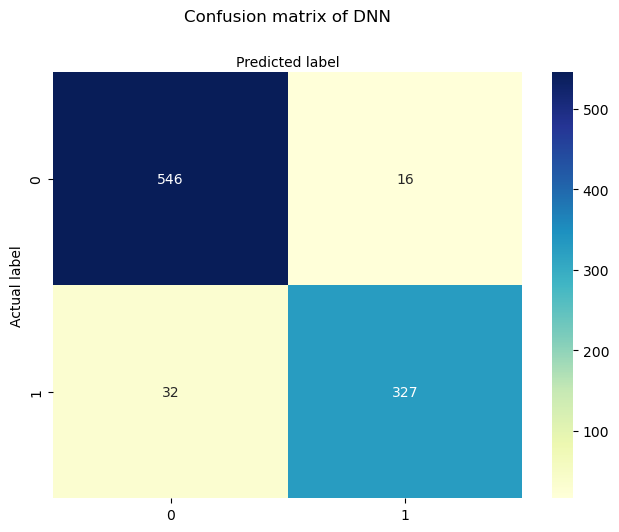

In [35]:
y_pred=best_model_DNN.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#visualizing the confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of DNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# $Logistic$ $regression$
We're gonna use the same set of X_train, X_test, y_train and y_test data in the first section

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Building the logistique regression model

In [37]:
from sklearn.linear_model import LogisticRegression
logistic_model_v1 = LogisticRegression(random_state=16, max_iter=1000, solver='lbfgs', C=0.1).fit(X_train, y_train)
#predicted values
y_pred = logistic_model_v1.predict(X_test)

## Evaluating the model

### Confusion matrix

In [38]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

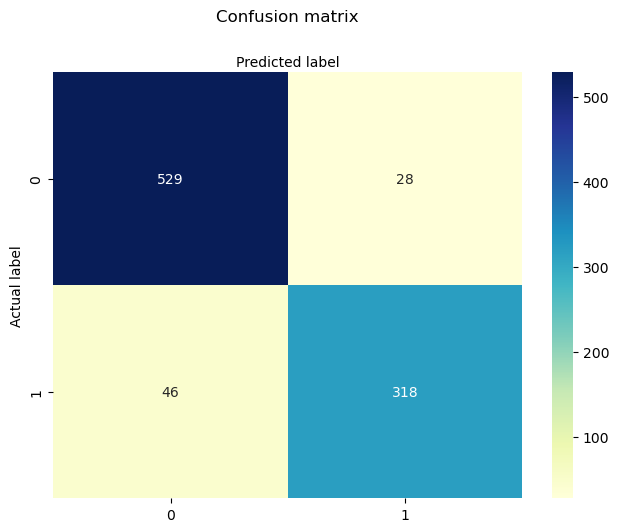

In [39]:
#visualizing the confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
from sklearn.metrics import classification_report
target_names = ['not spam', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    not spam       0.92      0.95      0.93       557
        spam       0.92      0.87      0.90       364

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



In [41]:
import matplotlib.pyplot as plt


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model_v1.predict(X_train)

y_test_pred = logistic_model_v1.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

Accuracy sur l'ensemble d'entraînement : 0.925
Accuracy sur l'ensemble de validation : 0.9196525515743756


### ROC Curve 

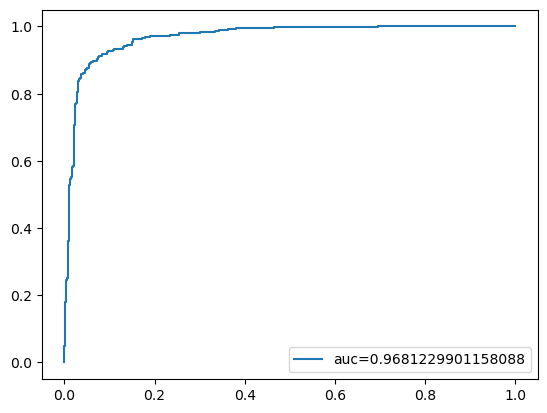

In [42]:
y_pred_proba = logistic_model_v1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Validation croisée 
Nous allons utilisé **GridSearchCV**  pour trouver les meilleurs hyperparamètres d'un modèle tout en utilisant la validation croisée pour évaluer les performances. 

In [43]:
from sklearn.model_selection import GridSearchCV
#model
logistic_model = LogisticRegression()

# Grille des hyperparamètres à explorer
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'max_iter': [500, 1000]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=6, scoring='accuracy')

# Exécution de la recherche par grille avec validation croisée
grid_search.fit(X_train, y_train)

# Récupération des meilleurs hyperparamètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres :", best_params)
print("Meilleur score obtenu :", best_score)

Meilleurs hyperparamètres : {'C': 1.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur score obtenu : 0.9255428438837847


Choix final des hyperparams

In [44]:
logistic_model = LogisticRegression(penalty='l1', max_iter=500, solver='liblinear', C=10, random_state=16).fit(X_train, y_train)

Evaluation du modèle finale 

Text(0.5, 427.9555555555555, 'Predicted label')

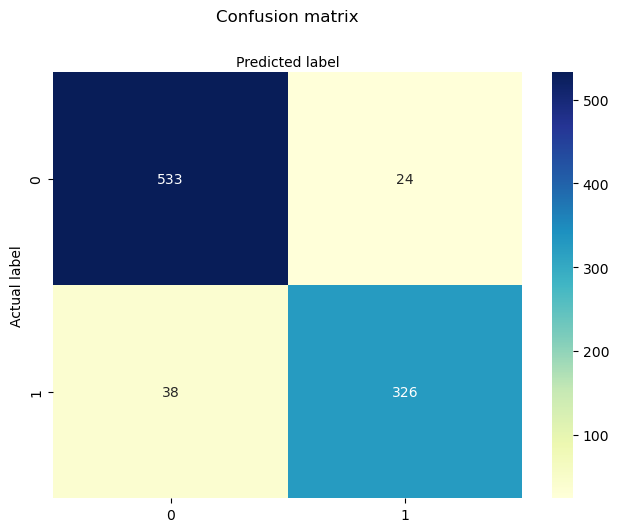

In [45]:
y_pred = logistic_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [46]:
target_names = ['not spam', 'spam']
accuracy_LR_test = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy_LR_test)
print(classification_report(y_test, y_pred, target_names=target_names))


Précision du modèle : 0.9326818675352877
              precision    recall  f1-score   support

    not spam       0.93      0.96      0.95       557
        spam       0.93      0.90      0.91       364

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In [47]:


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model.predict(X_train)

y_test_pred = logistic_model.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

Accuracy sur l'ensemble d'entraînement : 0.9293478260869565
Accuracy sur l'ensemble de validation : 0.9326818675352877


ROC Curve

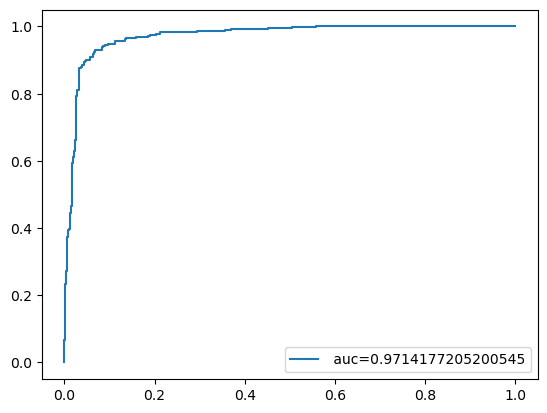

In [48]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

- Resumé :

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[logistic_model_v1,logistic_model]
y_pred_v1=logistic_model_v1.predict(X_test)
y_pred_v2=logistic_model.predict(X_test)
y_pred=[y_pred_v1,y_pred_v2]
Metrics=pd.DataFrame({
    i:[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics

,"LogisticRegression(C=0.1, max_iter=1000, random_state=16)","LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=16,\n solver='liblinear')"
Accuracy,0.919653,0.932682
Precision,0.873626,0.895604
Recall,0.919075,0.931429
F1,0.895775,0.913165


<b><font color=red> Résultat : </font></b>

- Après que nous avons utilisé la validation croisée nous avons eu des meilleurs résultats. 
- Meilleure modèle de la linear regression est le <b><font color=blue> 'logistic_model' </font></b>

# Gradient boosting

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification



# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_test)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GB_test = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GB_test)
print("Rapport de classification :\n", report)


Précision du modèle : 0.9511400651465798
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.96      0.96      0.96       542
        spam       0.94      0.94      0.94       379

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



### Normalisation des données 

In [52]:
from sklearn.preprocessing import StandardScaler

# Créez un objet StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X)
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.8)

In [53]:
# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model_norm = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model_norm.fit(X_norm_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_norm_test)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GBnorm_test = accuracy_score(y_test, y_pred)
report2 = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GBnorm_test)
print("Rapport de classification :\n", report2)


Précision du modèle : 0.8566775244299675
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.82      0.97      0.89       552
        spam       0.95      0.68      0.79       369

    accuracy                           0.86       921
   macro avg       0.88      0.83      0.84       921
weighted avg       0.87      0.86      0.85       921



c:\Users\zaiss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


### Comparaison des 3 modèles de gradient boosting

In [54]:
models = [gradient_boosting_model,gradient_boosting_model_norm]
modelsnames = ['gradient_boosting_model', 'gradient_boosting_model_PCA', 'gradient_boosting_model_norm']

y_pred_gradb=gradient_boosting_model.predict(X_test)
y_pred_gradb_norm=gradient_boosting_model_norm.predict(X_norm_test)
accuracies = [accuracy_GB_test, accuracy_GBnorm_test]

best_accuracy_gb = max(accuracies)
index_best_accuracy = accuracies.index(best_accuracy_gb)
best_model_name = modelsnames[index_best_accuracy]
best_model_gb = models[index_best_accuracy]
best_model_loss_gb = losses[index_best_accuracy]

print(f"Meilleur modèle selon l'accuracy : {best_model_name}")
print(f"Accuracy : {best_accuracy_gb}")
print(f"Loss associée : {best_model_loss_gb}")



Meilleur modèle selon l'accuracy : gradient_boosting_model
Accuracy : 0.9511400651465798
Loss associée : 0.19670310616493225


--> le meilleur modèle et le gradient boosting entrainée sur des données normaux (sans normalisation et PCA)

# Evaluating the Three best models :

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[best_model_DNN,logistic_model,best_model_gb]
y_pred_model=best_model_DNN.predict(X_test)
y_pred_model = (y_pred_model > 0.5).astype(int)
y_pred_logistic=logistic_model.predict(X_test)
y_pred_gradb=best_model_gb.predict(X_test)

y_pred=[y_pred_model,y_pred_logistic, y_pred_gradb]
Metrics=pd.DataFrame({
    str(i):[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics

29/29 [==============================] - 0s 2ms/step


,<keras.src.engine.sequential.Sequential object at 0x00000230B7941950>,"LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=16,\n solver='liblinear')",GradientBoostingClassifier(random_state=42)
Accuracy,0.931596,0.914224,0.955483
Precision,0.882353,0.865546,0.935574
Recall,0.937500,0.908824,0.948864
F1,0.909091,0.886657,0.942172
